In [1]:
import sys

full_path_to_modul_dir = 'D:\mcbj_stmbj'  # here enter the full path to the directory that contains the modul on your computer
sys.path.append(full_path_to_modul_dir)

from mcbj import *
import plots  # complex plot layouts
import filter_traces  # to filter traces

# 2023.08.11.

In [2]:
date = "23_08_11"
home_folder = Path(f'//DATACENTER/BreakJunction_group/BJ_Data/{date}')

## Hold measurements

### Stability

In [3]:
traces = np.append(np.arange(3543, 8963, 1), np.arange(9652, 10584, 1))

In [18]:
# del trace_nums_pull
# del trace_nums_push
# del hold_sets_pull
# del hold_sets_push
# del hold_triggers_pull
# del hold_triggers_push
# del hold_starts_pull
# del hold_starts_push
# del hold_ends_pull
# del hold_ends_push

In [19]:
# for which_trace in tqdm(traces, desc='Iterating over traces:'):
#     try:
#         trace_pair = TracePair(which_trace, load_from=home_folder)

#         hold_trace = HoldTrace(which_trace, load_from=home_folder,
#                                bias_offset=0, r_serial_ohm=trace_pair.R_serial,
#                                sample_rate=trace_pair.sample_rate, min_step_len=6_000, min_height=1)
#         try:
#             trace_nums_pull = np.append(trace_nums_pull, trace_pair.trace_num)
#             trace_nums_push = np.append(trace_nums_push, trace_pair.trace_num)

#             hold_sets_pull = np.append(hold_sets_pull, trace_pair.hold_set_pull)
#             hold_sets_push = np.append(hold_sets_push, trace_pair.hold_set_push)

#             hold_triggers_pull = np.append(hold_triggers_pull, trace_pair.hold_conductance_pull)
#             hold_triggers_push = np.append(hold_triggers_push, trace_pair.hold_conductance_push)

#             hold_starts_pull = np.append(hold_starts_pull, hold_trace.G_hold_pull)
#             hold_starts_push = np.append(hold_starts_push, hold_trace.G_hold_push)

#             hold_ends_pull = np.append(hold_ends_pull, hold_trace.G_avg_pull)
#             hold_ends_push = np.append(hold_ends_push, hold_trace.G_avg_push)
#         except NameError:
#             trace_nums_pull = np.array([trace_pair.trace_num])
#             trace_nums_push = np.array([trace_pair.trace_num])
#             hold_sets_pull = np.array([trace_pair.hold_set_pull])
#             hold_sets_push = np.array([trace_pair.hold_set_push])
#             hold_triggers_pull = np.array([trace_pair.hold_conductance_pull])
#             hold_triggers_push = np.array([trace_pair.hold_conductance_push])
#             hold_starts_pull = np.array([hold_trace.G_hold_pull])
#             hold_starts_push = np.array([hold_trace.G_hold_push])
#             hold_ends_pull = np.array([hold_trace.G_avg_pull])
#             hold_ends_push = np.array([hold_trace.G_avg_push])
#     except MeasurementNotComplete:
#         continue

Iterating over traces::   0%|          | 0/6352 [00:00<?, ?it/s]

In [30]:
# pull_df = pd.DataFrame({'trace_num': trace_nums_pull, 'set': hold_sets_pull, 'trigger': hold_triggers_pull, 'start': hold_starts_pull, 'end': hold_ends_pull})
# push_df = pd.DataFrame({'trace_num': trace_nums_push, 'set': hold_sets_push, 'trigger': hold_triggers_push, 'start': hold_starts_push, 'end': hold_ends_push})

In [31]:
# pull_df.to_csv(home_folder.joinpath('results/stability/pull_stability_data.csv'), index=False)
# push_df.to_csv(home_folder.joinpath('results/stability/push_stability_data.csv'), index=False)

In [22]:
pull_df = pd.read_csv(home_folder.joinpath('results/stability/pull_stability_data.csv'))
push_df = pd.read_csv(home_folder.joinpath('results/stability/push_stability_data.csv'))

In [23]:
pull_df

,trace_num,set,trigger,start,end
0,3543,0.01,0.011228,0.000191,0.000003
1,3544,0.01,0.006003,0.000016,0.000003
2,3545,0.01,0.006994,0.000345,0.000003
3,3546,0.01,0.006676,0.000086,0.000004
4,3547,0.01,0.013899,0.000330,0.000002
...,...,...,...,...,...
6346,10579,0.01,0.009982,0.005779,0.000013
6347,10580,0.01,0.007851,0.003924,0.000015
6348,10581,0.01,0.008500,0.003976,0.000010
6349,10582,0.01,0.010096,0.005698,0.000039


In [24]:
push_df

,trace_num,set,trigger,start,end
0,3543,0.001,0.001016,0.000954,0.002431
1,3544,0.001,0.001083,0.001159,0.007009
2,3545,0.001,0.001032,0.000704,0.002088
3,3546,0.001,0.001001,0.000462,0.011649
4,3547,0.001,0.001120,0.000725,0.016674
...,...,...,...,...,...
6346,10579,0.001,0.001004,0.001353,0.003504
6347,10580,0.001,0.000961,0.000776,0.004896
6348,10581,0.001,0.001077,0.000747,0.002582
6349,10582,0.001,0.001016,0.000759,0.000796


(<AxesSubplot:xlabel='trigger', ylabel='start'>,
 <AxesSubplot:xlabel='trigger'>,
 <AxesSubplot:ylabel='start'>)

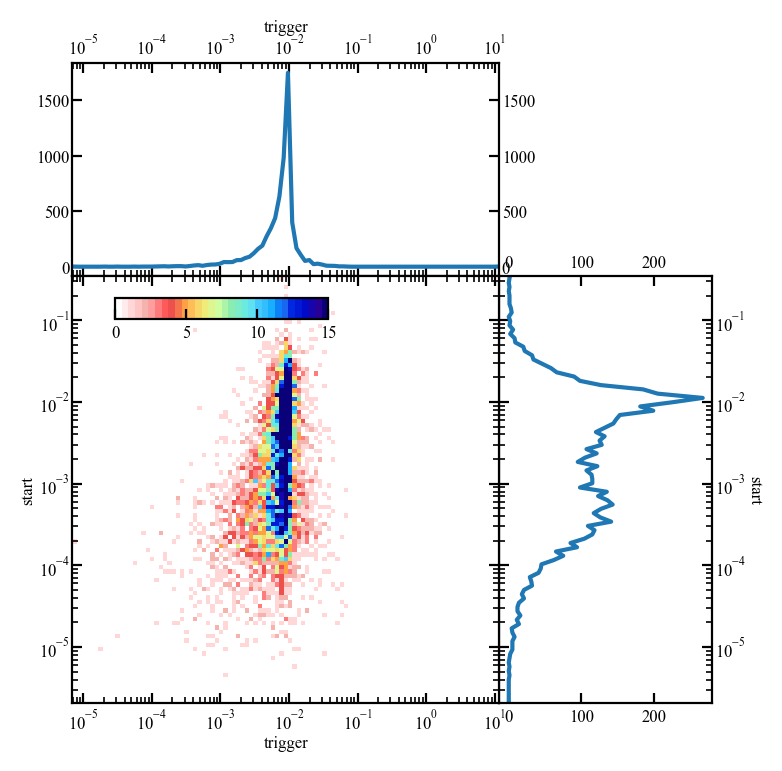

In [26]:
plots.heatmap_hist_from_source(df=pull_df, x='trigger', y='start', c='red', vmax=15)

(<AxesSubplot:xlabel='trigger', ylabel='start'>,
 <AxesSubplot:xlabel='trigger'>,
 <AxesSubplot:ylabel='start'>)

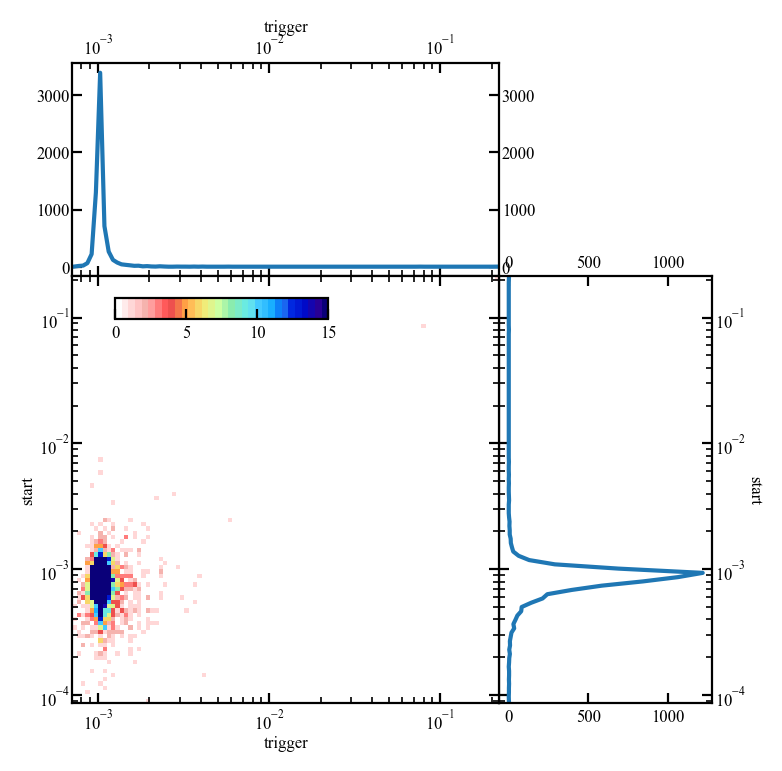

In [29]:
plots.heatmap_hist_from_source(df=push_df, x='trigger', y='start', c='red', vmax=15)

6351
6351


(<AxesSubplot:xlabel='trigger', ylabel='start'>,
 <AxesSubplot:xlabel='trigger'>,
 <AxesSubplot:ylabel='start'>)

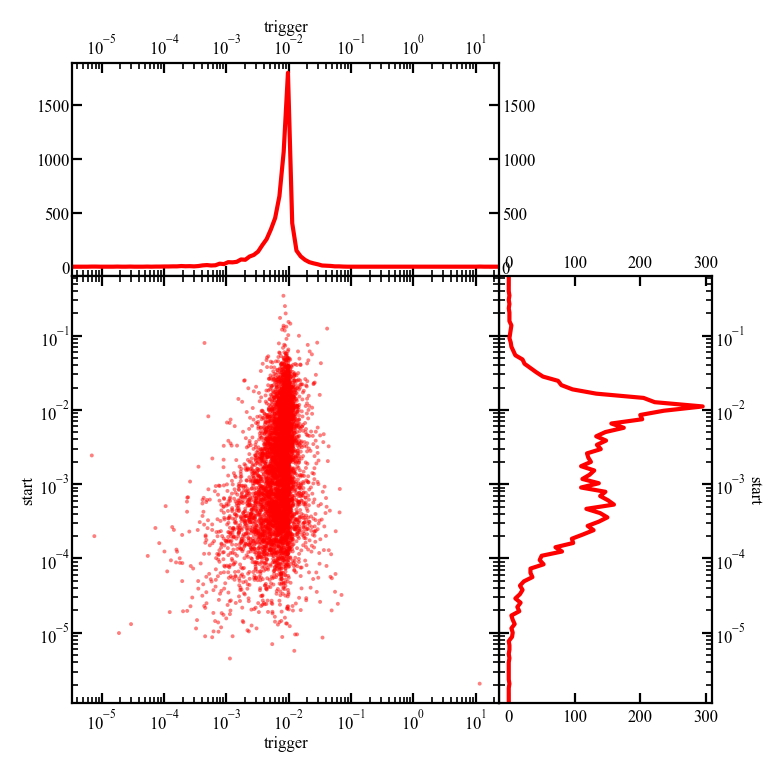

In [28]:
plots.scatter_hist_from_source(df=pull_df, x='trigger', y='start', c='red', alpha=0.5)

[0.00967951]
[0.00967951]
[0.01084822]
[3.31517897e-06]


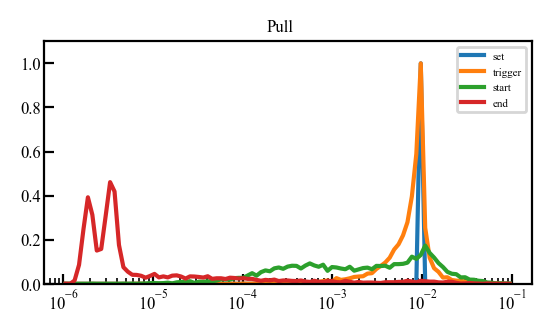

In [50]:
fig, ax = plt.subplots(1, figsize=utils.cm2inch((8, 4)), dpi=200)

scale_factor=6350
for i in pull_df.columns[1:]:
    xbins, hist = utils.calc_hist_1d_single(data=pull_df[i], xrange=(1e-6, 1e-1),
                                            xbins_num=101, log_scale=True, bin_mode='total')
    if i == 'trigger':
        scale_factor=max(hist)
    ax.plot(xbins, hist/scale_factor, label=i)
    ax.set_xscale('log')
    ax.legend(fontsize=4)
    fig.suptitle('Pull', y=0.95, fontsize=6)
    print(xbins[hist==max(hist)])
    ax.set_ylim(0, 1.1)

In [49]:
print(sum(hist))

6350


[0.00099027]
[0.00099027]
[0.00088359]
[0.00124384 0.00139402]


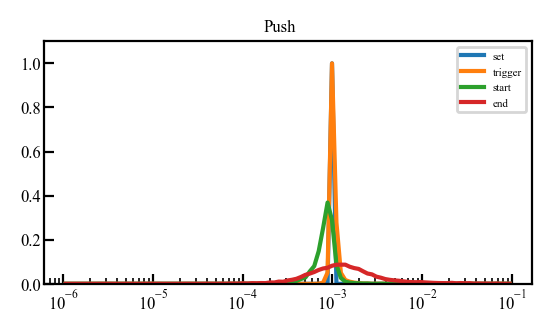

In [51]:
fig, ax = plt.subplots(1, figsize=utils.cm2inch((8, 4)), dpi=200)

scale_factor=6350
for i in pull_df.columns[1:]:
    xbins, hist = utils.calc_hist_1d_single(data=push_df[i], xrange=(1e-6, 1e-1),
                                            xbins_num=101, log_scale=True, bin_mode='total')
    if i == 'trigger':
        scale_factor=max(hist)
    ax.plot(xbins, hist/scale_factor, label=i)
    ax.set_xscale('log')
    ax.legend(fontsize=4)
    fig.suptitle('Push', y=0.95, fontsize=6)
    print(xbins[hist==max(hist)])
    ax.set_ylim(0, 1.1)

In [ ]:
# 0.01061009 101
# 0.00967951 100

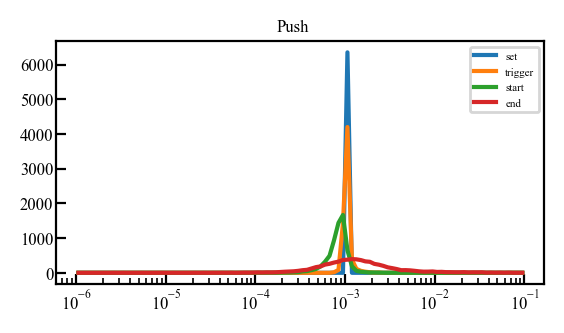

In [34]:
fig, ax = plt.subplots(1, figsize=utils.cm2inch((8, 4)), dpi=200)

for i in pull_df.columns[1:]:
    xbins, hist = utils.calc_hist_1d_single(data=push_df[i], xrange=(1e-6, 1e-1),
                                            xbins_num=100, log_scale=True, bin_mode='total')
    ax.plot(xbins, hist, label=i)
    ax.set_xscale('log')
    ax.legend(fontsize=4)
    fig.suptitle('Push', y=0.95, fontsize=6)

In [4]:
did_not_break_pull, did_not_break_push = filter_traces.filter_hold(home_folder,
                                                                   filter_condition=filter_traces.does_not_break_array,
                                                                   traces=traces,
                                                                   bias_offset=0, r_serial_ohm=100_100,
                                                                   min_step_len=4_000)

  0%|          | 0/6352 [00:00<?, ?it/s]

In [5]:
print(f'pull: {did_not_break_pull.shape[0]/traces.shape[0]*100}%')
print(f'push: {did_not_break_push.shape[0]/traces.shape[0]*100}%')

pull: 21.804156171284635%
push: 99.87405541561712%


In [4]:
def calc_hold_histogram(traces: np.ndarray, direction: str = 'pull',
                        xrange: Tuple[int, int] = (0, 150_000), xbins_num: int = 15_000,
                        yrange: Tuple[float, float] = (1e-2, 100), ybins_num: int = 100, y_bin_mode: str = 'total'):
    pull_conds = list()
    count=0

    # if 'H_pull' in locals():
    #     del(H_pull)

    # if 'H_push' in locals():
    #     del(H_push)

    relax_times = []

    xbins = np.linspace(xrange[0], xrange[1], num=xbins_num+1)  # ~for each trace 10 points in each horizontal bin
    
    if y_bin_mode == 'decade':
        num_of_decs = np.log10(yrange[1]) - np.log10(yrange[0])
        ybins = np.logspace(np.log10(yrange[0]), np.log10(yrange[1]), num=int(ybins_num * num_of_decs)+1, base=10)
    else:
        ybins = np.logspace(np.log10(yrange[0]), np.log10(yrange[1]), num=ybins_num+1, base=10)

    for trace_num in tqdm(traces, desc="Processing traces"):
        try:
            bj_trace = TracePair(trace=trace_num, load_from=home_folder)
            hold_trace = HoldTrace(trace=trace_num, load_from=home_folder,
                                   bias_offset=0, r_serial_ohm=bj_trace.R_serial,
                                   sample_rate=bj_trace.sample_rate, min_step_len=20_000)
            
            if direction == 'pull':
                hold_conductance = hold_trace.hold_conductance_pull
            elif direction == 'push':
                hold_conductance = hold_trace.hold_conductance_push
            else:
                raise ValueError(f'Unknown direction {direction}. Valid values: "pull", "push".')

            h, xedges, yedges = np.histogram2d(np.arange(0, hold_conductance.shape[0]),
                                               hold_conductance/hold_conductance[-1],
                                               bins=[xbins, ybins])
            x_mesh, y_mesh = np.meshgrid(xedges, yedges)
            
            try:
                H += h.T
            except NameError:
                H = h.T

            count += 1

            relax_ends_at, relax_time, relax_amount = filter_traces.measure_relaxation(hold_conductance,
                                                                                       conductance_limit=2)
            relax_times.append(relax_time)

        except KeyError:
            break
        except MeasurementNotComplete:
            print(f'Trace {trace_num} unfinished.')

    bins_relax_time, hist_relax_time = utils.calc_hist_1d_single(data=relax_times,
                                                                 xrange=(0, 3),
                                                                 xbins_num=30,
                                                                 log_scale=False)
    
    return x_mesh, y_mesh, H, bins_relax_time, hist_relax_time

In [5]:
x_mesh_pull_filt_2, y_mesh_pull_filt_2, H_pull_filt_2, bins_relax_time_pull_filt_2, hist_relax_time_pull_filt_2 =\
    calc_hold_histogram(traces = traces, direction='pull',
                        xrange=(0, 150_000), xbins_num=15_000,
                        yrange=(1e-2, 1000), ybins_num=30, y_bin_mode='decade')

x_mesh_push_filt_2, y_mesh_push_filt_2, H_push_filt_2, bins_relax_time_push_filt_2, hist_relax_time_push_filt_2 =\
    calc_hold_histogram(traces = traces, direction='push',
                        xrange=(0, 150_000), xbins_num=15_000,
                        yrange=(1e-2, 100), ybins_num=30, y_bin_mode='decade')

Processing traces:   0%|          | 0/6352 [00:00<?, ?it/s]

Trace 8898 unfinished.


Processing traces:   0%|          | 0/6352 [00:00<?, ?it/s]

Trace 8898 unfinished.


In [6]:
def plot_hold_histograms(x_mesh_pull, y_mesh_pull, H_pull,
                         x_mesh_push, y_mesh_push, H_push, vmax_pull=None, vmax_push=None):
    
    fig = plt.figure(figsize=utils.point2inch(240, 160), dpi=600)  # figsize: (width, height) in inches

    gs_total = gridspec.GridSpec(nrows=2, ncols=2, height_ratios=(1, 1), width_ratios=(5, 2),
                               figure=fig, left=0.1, right=0.9, top=0.9, bottom=0.2, wspace=0.07, hspace=0)

    gs_sub = gridspec.GridSpecFromSubplotSpec(nrows=2, ncols=2,
                                              subplot_spec=gs_total[:, 1], wspace=0.1, hspace=0)

    # gs_relax_2d = gridspec.GridSpecFromSubplotSpec(nrows=2, ncols=1,
    #                                                subplot_spec=gs_total[:, 1], wspace=0, hspace=0)

    ax_relax_hist_pull = fig.add_subplot(gs_sub[0, 0])
    ax_relax_pull = fig.add_subplot(gs_total[0, 0], sharey=ax_relax_hist_pull)
    ax_relax_push = fig.add_subplot(gs_total[1, 0], sharex=ax_relax_pull, sharey=ax_relax_pull)
    ax_relax_hist_push = fig.add_subplot(gs_sub[1, 0], sharey=ax_relax_push)
    
    ax_relax_hist_pull_2 = fig.add_subplot(gs_sub[0, 1], sharey=ax_relax_pull)
    ax_relax_hist_push_2 = fig.add_subplot(gs_sub[1, 1], sharey=ax_relax_push)
    
    ax_relax_hist_pull.spines['right'].set_visible(False)
    ax_relax_hist_push.spines['right'].set_visible(False)
    ax_relax_hist_pull_2.spines['left'].set_visible(False)
    ax_relax_hist_push_2.spines['left'].set_visible(False)

    ax_relax_pull.xaxis.tick_top()
    ax_relax_pull.xaxis.set_label_position('top')
    ax_relax_pull.xaxis.set_ticks_position('both')
    ax_relax_pull.yaxis.set_ticks_position('both')

    ax_relax_hist_pull.xaxis.tick_top()
    ax_relax_hist_pull.xaxis.set_label_position('top')
    ax_relax_hist_pull.xaxis.set_ticks_position('both')
    
    ax_relax_hist_pull_2.xaxis.tick_top()
    ax_relax_hist_pull_2.xaxis.set_label_position('top')
    ax_relax_hist_pull_2.xaxis.set_ticks_position('both')
    ax_relax_hist_pull_2.yaxis.tick_right()
    ax_relax_hist_pull_2.yaxis.set_label_position('right')
    ax_relax_hist_pull_2.yaxis.set_ticks_position('right')

    ax_relax_push.xaxis.set_ticks_position('both')
    ax_relax_push.yaxis.set_ticks_position('both')

    ax_relax_hist_push_2.yaxis.tick_right()
    ax_relax_hist_push_2.yaxis.set_label_position('right')
    ax_relax_hist_push_2.yaxis.set_ticks_position('right')

    ax_relax_push.yaxis.set_ticks_position('both')
    
    if vmax_pull is None:
        im_norm_pull = ax_relax_pull.pcolormesh(x_mesh_pull, y_mesh_pull, H_pull, cmap=utils.cmap_geo32)
    else:
        im_norm_pull = ax_relax_pull.pcolormesh(x_mesh_pull, y_mesh_pull, H_pull, cmap=utils.cmap_geo32, vmax=vmax_pull)
    if vmax_push is None:
        im_norm_push = ax_relax_push.pcolormesh(x_mesh_push, y_mesh_push, H_push, cmap=utils.cmap_geo32)
    else:
        im_norm_push = ax_relax_push.pcolormesh(x_mesh_push, y_mesh_push, H_push, cmap=utils.cmap_geo32, vmax=vmax_push)

    ax_relax_pull.set_yscale('log')
    # ax_relax_pull.set_ylim(0.05, 1.4e2)
    ax_relax_push.set_yscale('log')

    ax_relax_pull.yaxis.set_major_locator(ticker.LogLocator(base=10.0, subs=(1.0,), numticks=9))
    ax_relax_pull.yaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs=np.arange(0, 1, 0.2), numticks=9))

    ax_relax_hist_pull.plot(H_pull[:, 0] / sum(H_pull[:, 0]), utils.moving_average(np.unique(y_mesh_pull.flatten()), 2), lw=0.5, c=utils.blues[0])
    ax_relax_hist_pull.plot(H_pull[:, H_pull.shape[1]//2] / sum(H_pull[:, H_pull.shape[1]//2]), utils.moving_average(np.unique(y_mesh_pull.flatten()), 2), lw=0.5, c=utils.blues[3])
    ax_relax_hist_pull.plot(H_pull[:, -1] / sum(H_pull[:, -1]), utils.moving_average(np.unique(y_mesh_pull.flatten()), 2), lw=0.5, c=utils.blues[5])
    
    ax_relax_hist_pull_2.plot(H_pull[:, 0] / sum(H_pull[:, 0]), utils.moving_average(np.unique(y_mesh_pull.flatten()), 2), lw=0.5, c=utils.blues[0])
    ax_relax_hist_pull_2.plot(H_pull[:, H_pull.shape[1]//2] / sum(H_pull[:, H_pull.shape[1]//2]), utils.moving_average(np.unique(y_mesh_pull.flatten()), 2), lw=0.5, c=utils.blues[3])
    ax_relax_hist_pull_2.plot(H_pull[:, -1] / sum(H_pull[:, -1]), utils.moving_average(np.unique(y_mesh_pull.flatten()), 2), lw=0.5, c=utils.blues[5])
    
    ax_relax_pull.axvline(np.unique(x_mesh_pull.flatten())[0], lw=0.5, ls='--', c=utils.blues[0])
    ax_relax_pull.axvline(np.unique(x_mesh_pull.flatten())[H_pull.shape[1]//2], lw=0.5, ls='--', c=utils.blues[3])
    ax_relax_pull.axvline(np.unique(x_mesh_pull.flatten())[-1], lw=0.5, ls='--', c=utils.blues[5])

    ax_relax_hist_push.plot(H_push[:, 0] / sum(H_push[:, 0]), utils.moving_average(np.unique(y_mesh_push.flatten()), 2), lw=0.5, c=utils.reds[0])
    ax_relax_hist_push.plot(H_push[:, H_push.shape[1]//2] / sum(H_push[:, H_push.shape[1]//2]), utils.moving_average(np.unique(y_mesh_push.flatten()), 2), lw=0.5, c=utils.reds[3])
    ax_relax_hist_push.plot(H_push[:, -1] / sum(H_push[:, -1]), utils.moving_average(np.unique(y_mesh_push.flatten()), 2), lw=0.5, c=utils.reds[5])
    
    ax_relax_hist_push_2.plot(H_push[:, 0] / sum(H_push[:, 0]), utils.moving_average(np.unique(y_mesh_push.flatten()), 2), lw=0.5, c=utils.reds[0])
    ax_relax_hist_push_2.plot(H_push[:, H_push.shape[1]//2] / sum(H_push[:, H_push.shape[1]//2]), utils.moving_average(np.unique(y_mesh_push.flatten()), 2), lw=0.5, c=utils.reds[3])
    ax_relax_hist_push_2.plot(H_push[:, -1] / sum(H_push[:, -1]), utils.moving_average(np.unique(y_mesh_push.flatten()), 2), lw=0.5, c=utils.reds[5])

    ax_relax_push.axvline(np.unique(x_mesh_push.flatten())[0], lw=0.5, ls='--', c=utils.reds[0])
    ax_relax_push.axvline(np.unique(x_mesh_push.flatten())[H_push.shape[1]//2], lw=0.5, ls='--', c=utils.reds[3])
    ax_relax_push.axvline(np.unique(x_mesh_push.flatten())[-1], lw=0.5, ls='--', c=utils.reds[5])
    
    
    # axis_max = max(max(H_pull[:, 0] / sum(H_pull[:, 0])), max(H_pull[:, H_pull.shape[1]//2] / sum(H_pull[:, H_pull.shape[1]//2])), max(H_pull[:, -1] / sum(H_pull[:, -1])),
    #                max(H_push[:, 0] / sum(H_push[:, 0])), max(H_push[:, H_push.shape[1]//2] / sum(H_push[:, H_push.shape[1]//2])), max(H_push[:, -1] / sum(H_push[:, -1])))
    # ax_relax_hist_pull.set_xlim(0, 1.1*axis_max)
    # ax_relax_hist_push.set_xlim(0, 1.1*axis_max)
    
    axis_max_pull_1 = max(H_pull[:, H_pull.shape[1]//2] / sum(H_pull[:, H_pull.shape[1]//2]))
    axis_max_pull_2 = max(H_pull[:, -1] / sum(H_pull[:, -1]))
    ax_relax_hist_pull.set_xlim(0, 1.1*axis_max_pull_1)
    ax_relax_hist_pull_2.set_xlim(1.1*axis_max_pull_1, 1.2*axis_max_pull_2)
    
    axis_max_push_1 = max(H_push[:, H_push.shape[1]//2] / sum(H_push[:, H_push.shape[1]//2]))
    axis_max_push_2 = max(H_push[:, -1] / sum(H_push[:, -1]))
    ax_relax_hist_push.set_xlim(0, 1.1*axis_max_push_1)
    ax_relax_hist_push_2.set_xlim(1.1*axis_max_push_1, 1.2*axis_max_push_2)

    ax_relax_pull.set_xlim(-5000, 155000)
    ax_relax_pull.set_xticks(np.arange(start=0, stop=150_001, step=50_000))
    ax_relax_pull.xaxis.set_minor_locator(ticker.MultipleLocator(10_000))
    ax_relax_pull.set_xticklabels(np.arange(start=0, stop=4, step=1))

    ax_relax_push.set_xlim(-5000, 155000)
    ax_relax_push.set_xticks(np.arange(start=0, stop=150_001, step=50_000))
    ax_relax_push.xaxis.set_minor_locator(ticker.MultipleLocator(10_000))
    ax_relax_push.set_xticklabels(np.arange(start=0, stop=4, step=1))

    ax_relax_pull.axhline(2, lw=0.5, ls='--', c='grey')
    ax_relax_pull.axhline(0.5, lw=0.5, ls='--', c='grey')
    ax_relax_push.axhline(2, lw=0.5, ls='--', c='grey')
    ax_relax_push.axhline(0.5, lw=0.5, ls='--', c='grey')

    ax_relax_hist_pull.axhline(2, lw=0.5, ls='--', c='grey')
    ax_relax_hist_pull.axhline(0.5, lw=0.5, ls='--', c='grey')
    ax_relax_hist_push.axhline(2, lw=0.5, ls='--', c='grey')
    ax_relax_hist_push.axhline(0.5, lw=0.5, ls='--', c='grey')
    
    ax_relax_hist_pull_2.axhline(2, lw=0.5, ls='--', c='grey')
    ax_relax_hist_pull_2.axhline(0.5, lw=0.5, ls='--', c='grey')
    ax_relax_hist_push_2.axhline(2, lw=0.5, ls='--', c='grey')
    ax_relax_hist_push_2.axhline(0.5, lw=0.5, ls='--', c='grey')
    
    # ax_relax_hist_pull.axvline(max(max(H_pull[:, 0]), max(H_pull[:, H_pull.shape[1]//2]), max(H_pull[:, -1])), lw=0.5, ls='--', c='lightgrey')
    # ax_relax_hist_push.axvline(max(max(H_pull[:, 0]), max(H_pull[:, H_pull.shape[1]//2]), max(H_pull[:, -1])), lw=0.5, ls='--', c='lightgrey')
    
    from matplotlib.ticker import MaxNLocator, MultipleLocator
    
    # ax_relax_hist_pull.xaxis.set_major_locator(MultipleLocator(1000))
    # ax_relax_hist_push.xaxis.set_major_locator(MultipleLocator(1000)) 

    ax_relax_pull.set_ylabel('Scaled cond. [a.u.]')
    ax_relax_push.set_ylabel('Scaled cond. [a.u.]')
    ax_relax_hist_pull_2.set_ylabel('Scaled cond. [a.u.]')
    ax_relax_hist_push_2.set_ylabel('Scaled cond. [a.u.]')

    ax_relax_pull.set_xlabel('Time[s]')
    ax_relax_push.set_xlabel('Time[s]')
    # ax_relax_hist_pull.set_xlabel('Counts [a.u.]')
    # ax_relax_hist_push.set_xlabel('Counts [a.u.]')
    
    ax_relax_hist_pull.text(axis_max_pull_1, 8e3, 'Counts [a.u.]', fontsize=6, ha='center')
    ax_relax_hist_push.text(axis_max_push_1, 5e-4, 'Counts [a.u.]', fontsize=6, ha='center')
    ax_relax_push.set_ylim(1e-2, 999)
    
    # ax_relax_hist_pull.tick_params(axis='y', colors='red')
    [t.set_color((1, 1, 1, 0)) for t in ax_relax_hist_pull.yaxis.get_ticklabels()]
    [t.set_color((1, 1, 1, 0)) for t in ax_relax_hist_push.yaxis.get_ticklabels()]
    # ax_relax_hist_push.axes.yaxis.set_ticklabels([])
    # ax_relax_hist_push.axes.yaxis.set_ticklabels([])

    # plt.savefig(home_folder.joinpath(f'results/article/fig_2.png'), bbox_inches='tight')

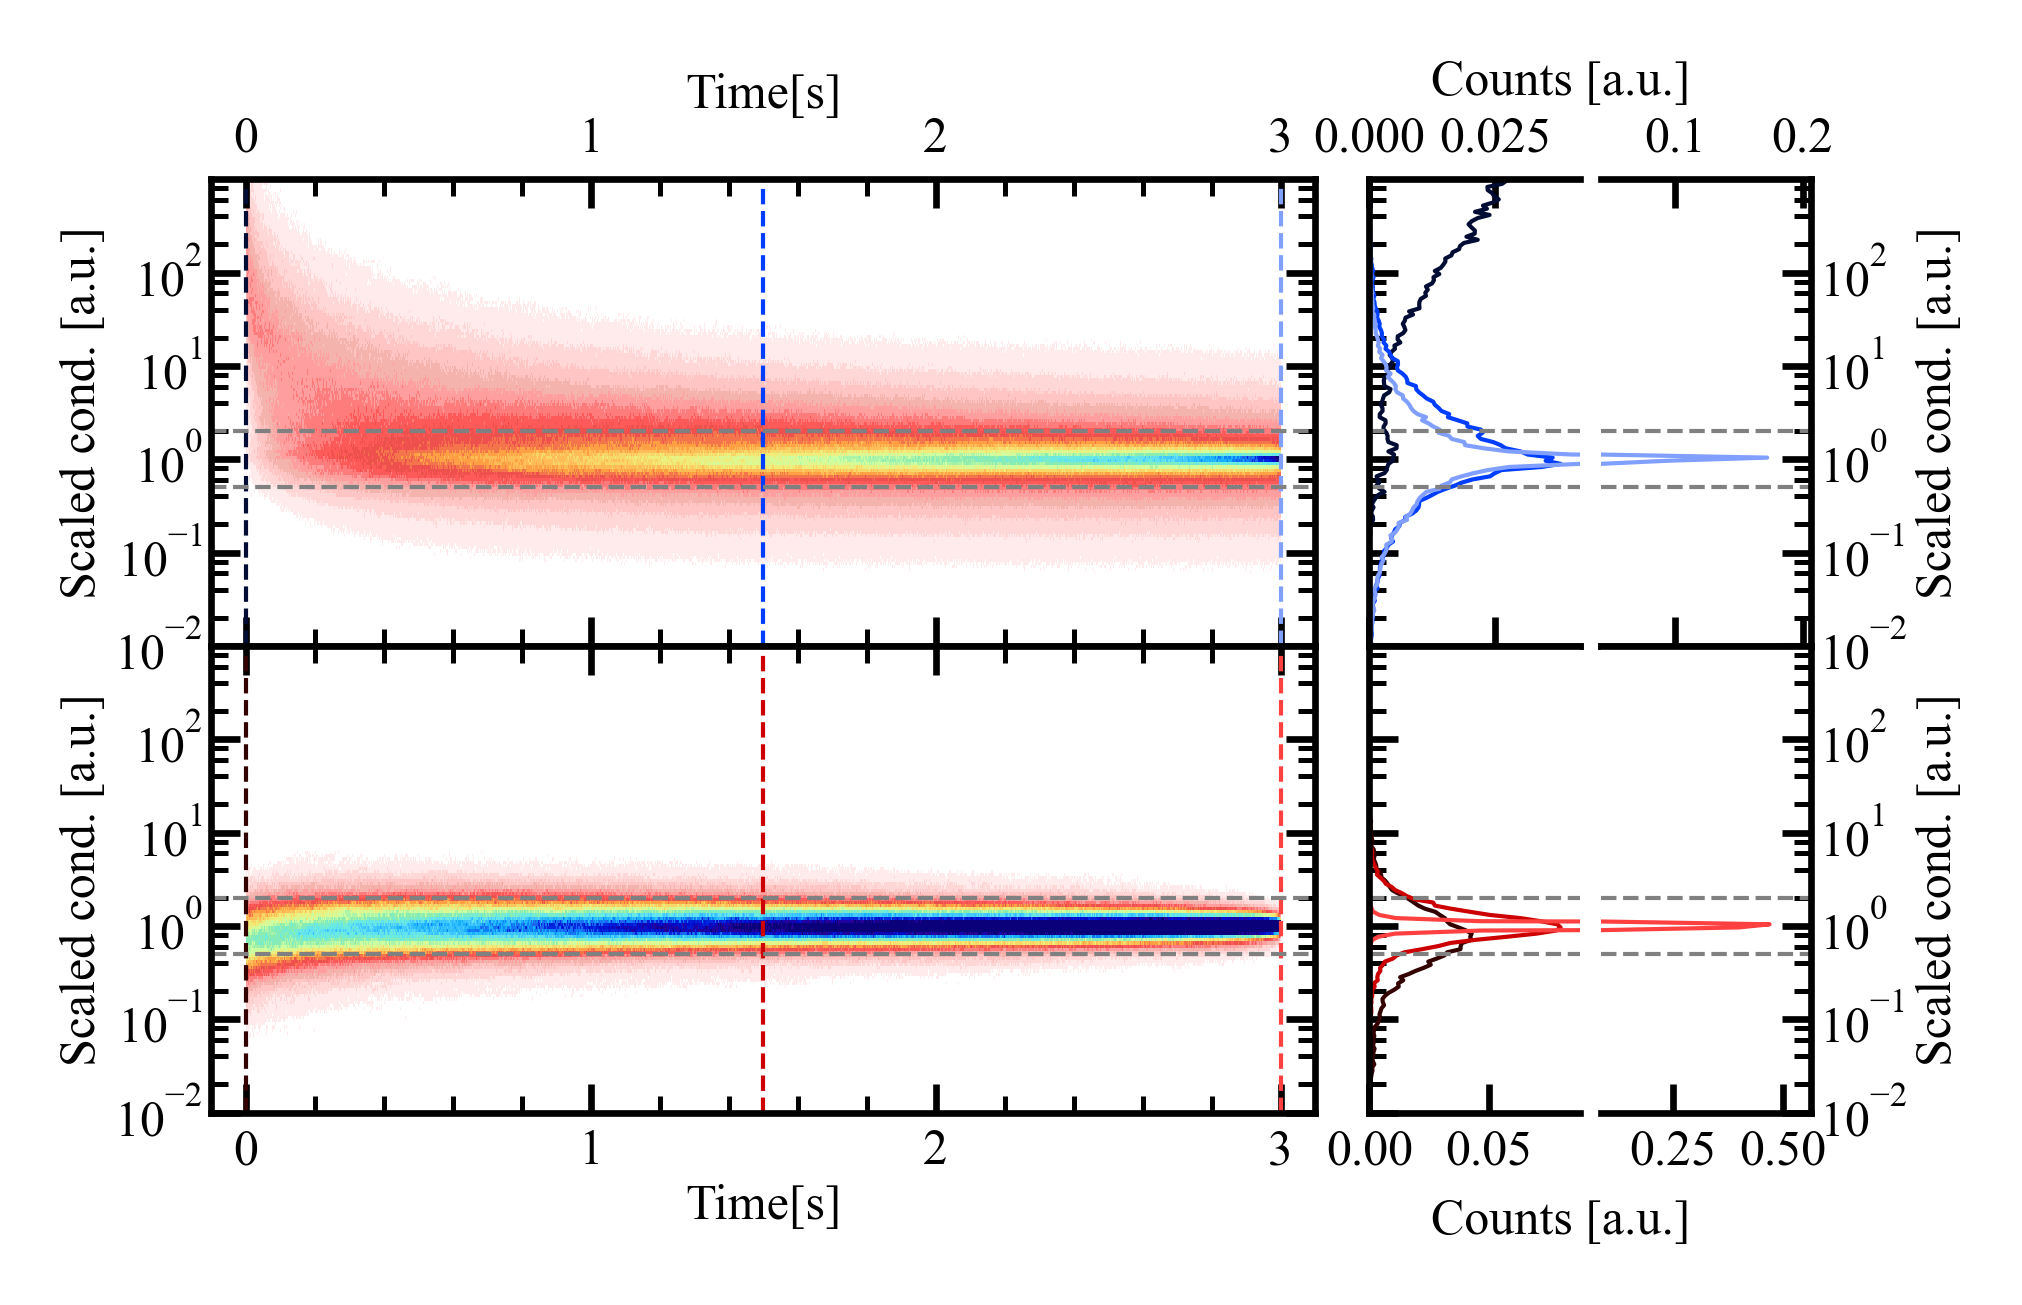

In [7]:
plot_hold_histograms(x_mesh_pull_filt_2, y_mesh_pull_filt_2, H_pull_filt_2,
                     x_mesh_push_filt_2, y_mesh_push_filt_2, H_push_filt_2, vmax_pull=5000, vmax_push=5000)